In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
df = pd.read_csv('arrh.csv')
df.head()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,0
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,0
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,0
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,0


In [78]:
df.columns[(df<0).any()].tolist()

['QRS',
 'chDI_JJwaveAmp',
 'chDI_QwaveAmp',
 'chDI_SwaveAmp',
 'chDI_PwaveAmp',
 'chDI_TwaveAmp',
 'chDI_QRSA',
 'chDI_QRSTA',
 'chDII_JJwaveAmp',
 'chDII_QwaveAmp',
 'chDII_SwaveAmp',
 'chDII_SPwaveAmp',
 'chDII_PwaveAmp',
 'chDII_TwaveAmp',
 'chDII_QRSA',
 'chDII_QRSTA',
 'chDIII_JJwaveAmp',
 'chDIII_QwaveAmp',
 'chDIII_SwaveAmp',
 'chDIII_SPwaveAmp',
 'chDIII_PwaveAmp',
 'chDIII_TwaveAmp',
 'chDIII_QRSA',
 'chDIII_QRSTA',
 'chAVR_JJwaveAmp',
 'chAVR_QwaveAmp',
 'chAVR_SwaveAmp',
 'chAVR_SPwaveAmp',
 'chAVR_PwaveAmp',
 'chAVR_TwaveAmp',
 'chAVR_QRSA',
 'chAVR_QRSTA',
 'chAVL_JJwaveAmp',
 'chAVL_QwaveAmp',
 'chAVL_SwaveAmp',
 'chAVL_PwaveAmp',
 'chAVL_TwaveAmp',
 'chAVL_QRSA',
 'chAVL_QRSTA',
 'chAVF_JJwaveAmp',
 'chAVF_QwaveAmp',
 'chAVF_SwaveAmp',
 'chAVF_SPwaveAmp',
 'chAVF_PwaveAmp',
 'chAVF_TwaveAmp',
 'chAVF_QRSA',
 'chAVF_QRSTA',
 'chV1_JJwaveAmp',
 'chV1_QwaveAmp',
 'chV1_SwaveAmp',
 'chV1_SPwaveAmp',
 'chV1_PwaveAmp',
 'chV1_TwaveAmp',
 'chV1_QRSA',
 'chV1_QRSTA',
 'chV2_JJw

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rf_model = RandomForestClassifier()
X = df.drop('class', axis=1)
y = df[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [80]:
# Set a range for n_estimators from 10 to 40 in steps of 10
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2,5,8,10]}

# Optimize for a RandomForestClassifier() using GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
grid.best_params_['max_depth']

C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

10

In [81]:
clf = RandomForestClassifier(random_state=1, max_depth=8).fit(X_train, y_train)

C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [82]:
from sklearn.feature_selection import f_classif, SelectKBest, chi2
vt = SelectKBest(f_classif, k=80).fit(X_train, y_train)
# Create a new dataset only containing the selected features

C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 19  21  24  67  69  71  72  83  84  86 115 131 132 139 141 143 145 151
 156 157 164 204 244 264 274] are constant.
  UserWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [83]:
X_train_reduced = vt.transform(X_train)

In [84]:
from sklearn.feature_selection import f_classif, SelectKBest
sk = SelectKBest(f_classif, k=100)
which_selected = sk.fit(X_train, y_train).get_support()
variables = X_train.columns[which_selected].tolist()
variables

C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 19  21  24  67  69  71  72  83  84  86 115 131 132 139 141 143 145 151
 156 157 164 204 244 264 274] are constant.
  UserWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['sex',
 'QRSduration',
 'Tinterval',
 'Pinterval',
 'T',
 'J',
 'heartrate',
 'chDI_Swave',
 'chDII_Qwave',
 'chDII_Swave',
 'chDII_intrinsicReflecttions',
 'chDII_DD_RRwaveExists',
 'chDIII_DD_RPwaveExists',
 'chAVR_Rwave',
 'chAVR_Swave',
 'chAVR_RPwave',
 'chAVL_Rwave',
 'chAVL_Swave',
 'chAVL_intrinsicReflecttions',
 'chAVF_Qwave',
 'chAVF_Swave',
 'chAVF_intrinsicReflecttions',
 'chV1_Qwave',
 'chV1_Swave',
 'chV1_RPwave',
 'chV1_intrinsicReflecttions',
 'chV1_DD_RRwaveExists',
 'chV2_Qwave',
 'chV2_Swave',
 'chV2_RPwave',
 'chV2_intrinsicReflecttions',
 'chV2_DD_RRwaveExists',
 'chV3_Qwave',
 'chV3_Rwave',
 'chV3_Swave',
 'chV3_DD_RTwaveExists',
 'chV4_Qwave',
 'chV4_Rwave',
 'chV4_Swave',
 'chV5_Qwave',
 'chV5_Swave',
 'chV5_intrinsicReflecttions',
 'chV6_Qwave',
 'chV6_intrinsicReflecttions',
 'chDI_JJwaveAmp',
 'chDI_SwaveAmp',
 'chDI_TwaveAmp',
 'chDI_QRSTA',
 'chDII_JJwaveAmp',
 'chDII_QwaveAmp',
 'chDII_RwaveAmp',
 'chDII_SwaveAmp',
 'chDII_TwaveAmp',
 'chDII_QRSA',
 'chDI

### How many features?
#### https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [86]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
# create pipeline
# rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=100)
# model = DecisionTreeClassifier()
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=100)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.853 (0.056)


>50 0.844 (0.049)
>55 0.855 (0.043)
>60 0.850 (0.058)
>65 0.855 (0.055)
>70 0.851 (0.059)
>75 0.858 (0.054)
>80 0.844 (0.054)
>85 0.854 (0.050)
>90 0.861 (0.053)
>95 0.841 (0.066)


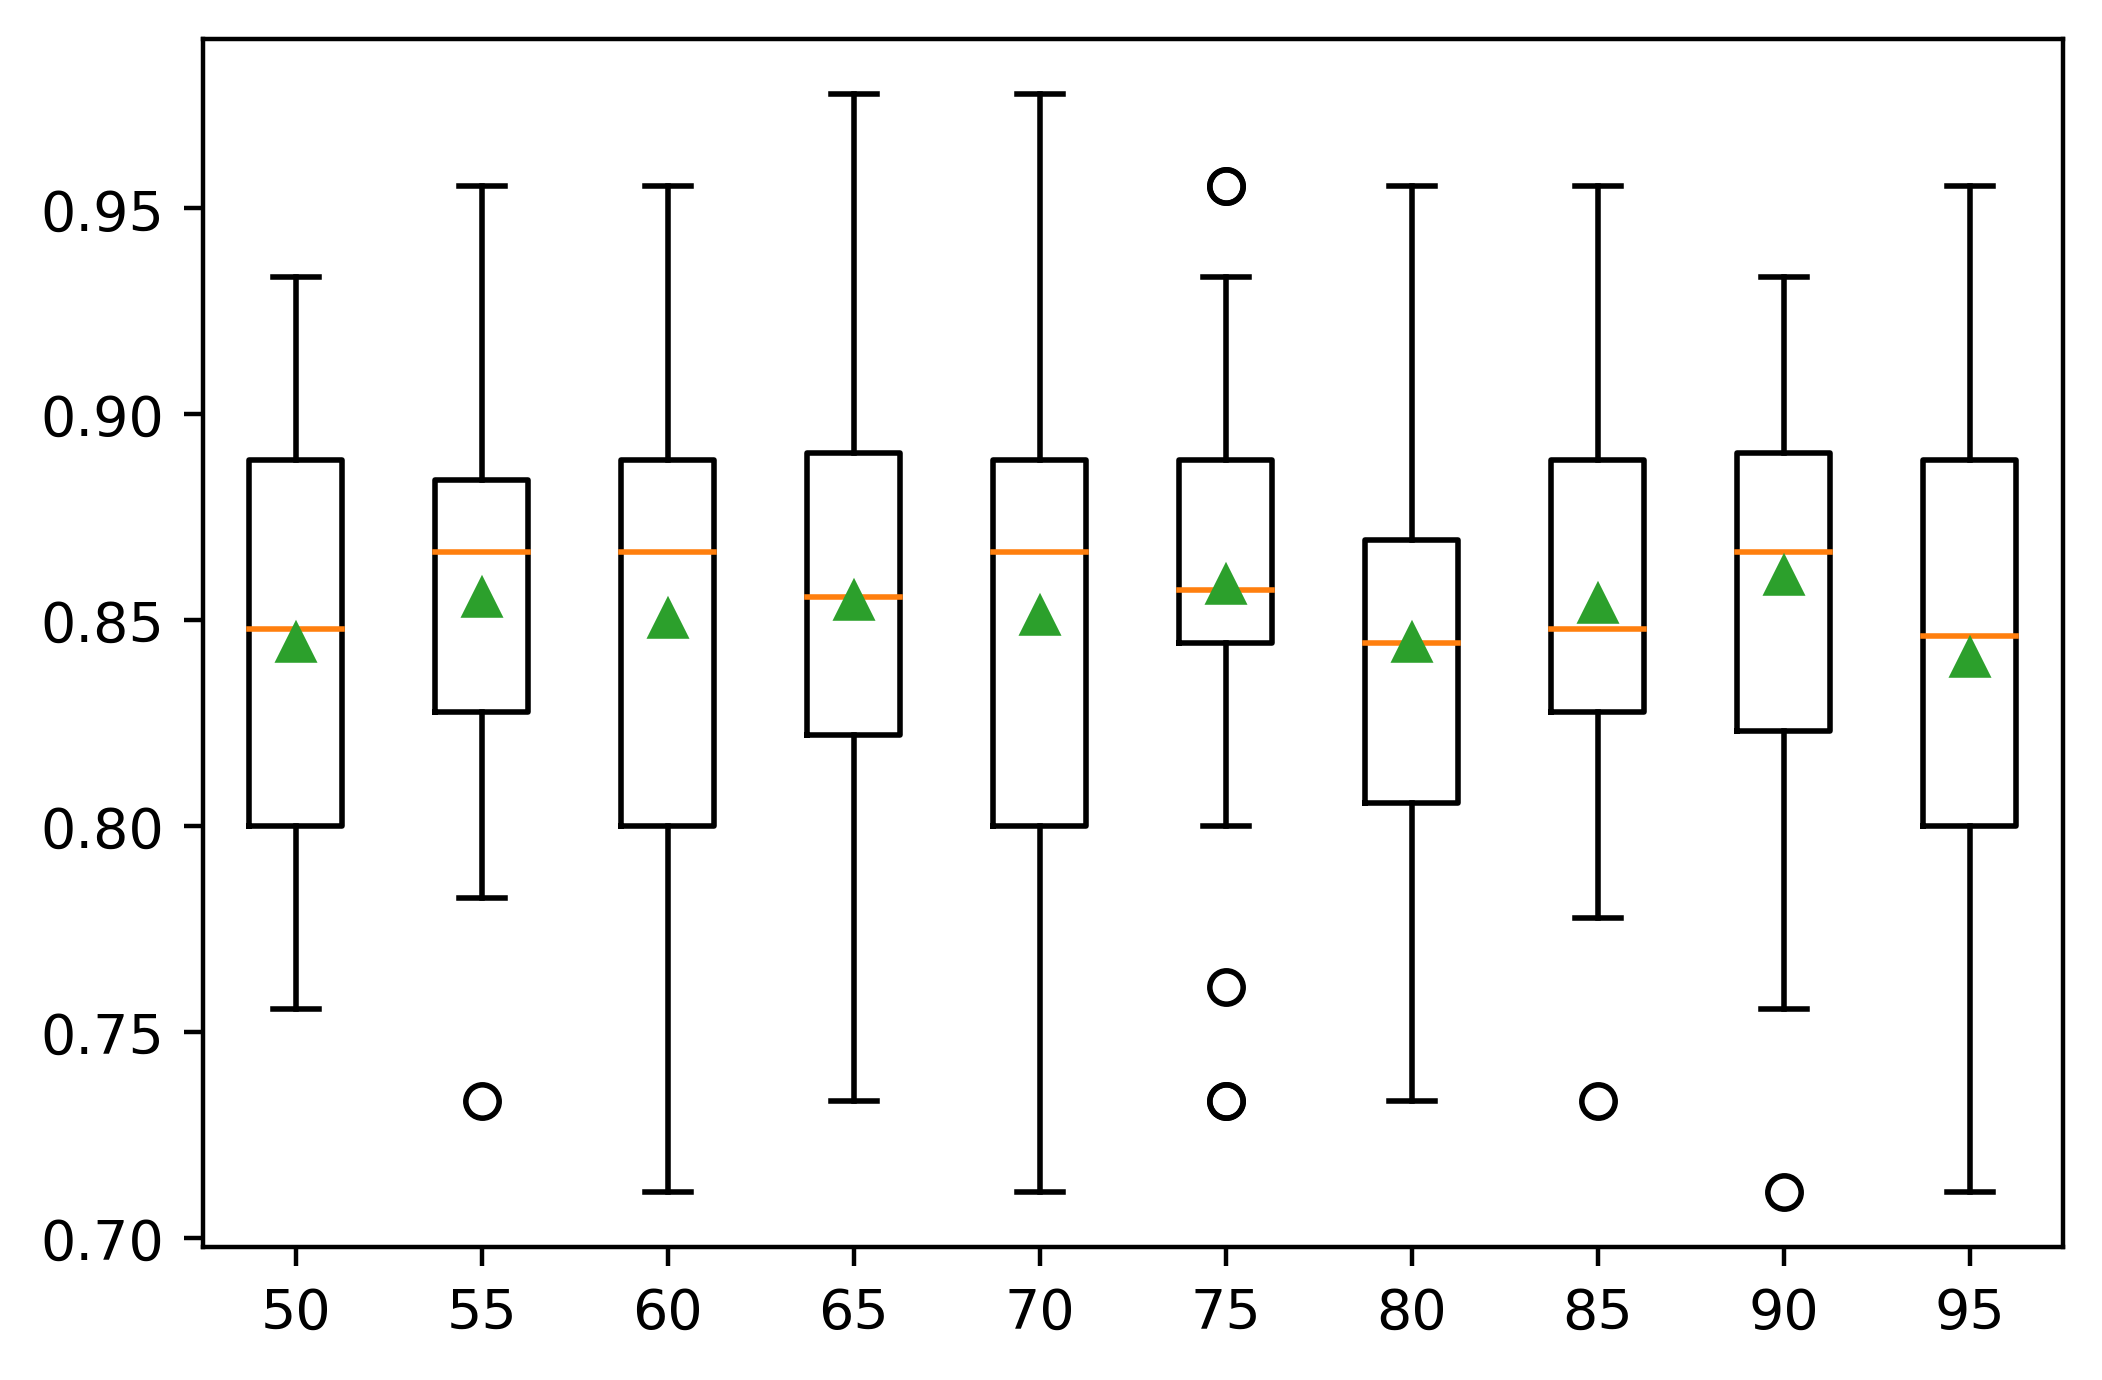

In [87]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a list of models to evaluate
# def get_models():
#     models = dict()
#     for i in range(50, 100, 5):
#         rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
#         model = DecisionTreeClassifier()
#         models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
#     return models
def get_models():
    models = dict()
    for i in range(50, 100, 5):
        rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
        model = RandomForestClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [69]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.782 (0.066)


In [71]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=100)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Column: 0, Selected False, Rank: 180.000
Column: 1, Selected False, Rank: 179.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selected True, Ra

>lr 0.647 (0.070)
>per 0.628 (0.079)
>cart 0.700 (0.067)
>rf 0.689 (0.073)
>gbm 0.713 (0.066)


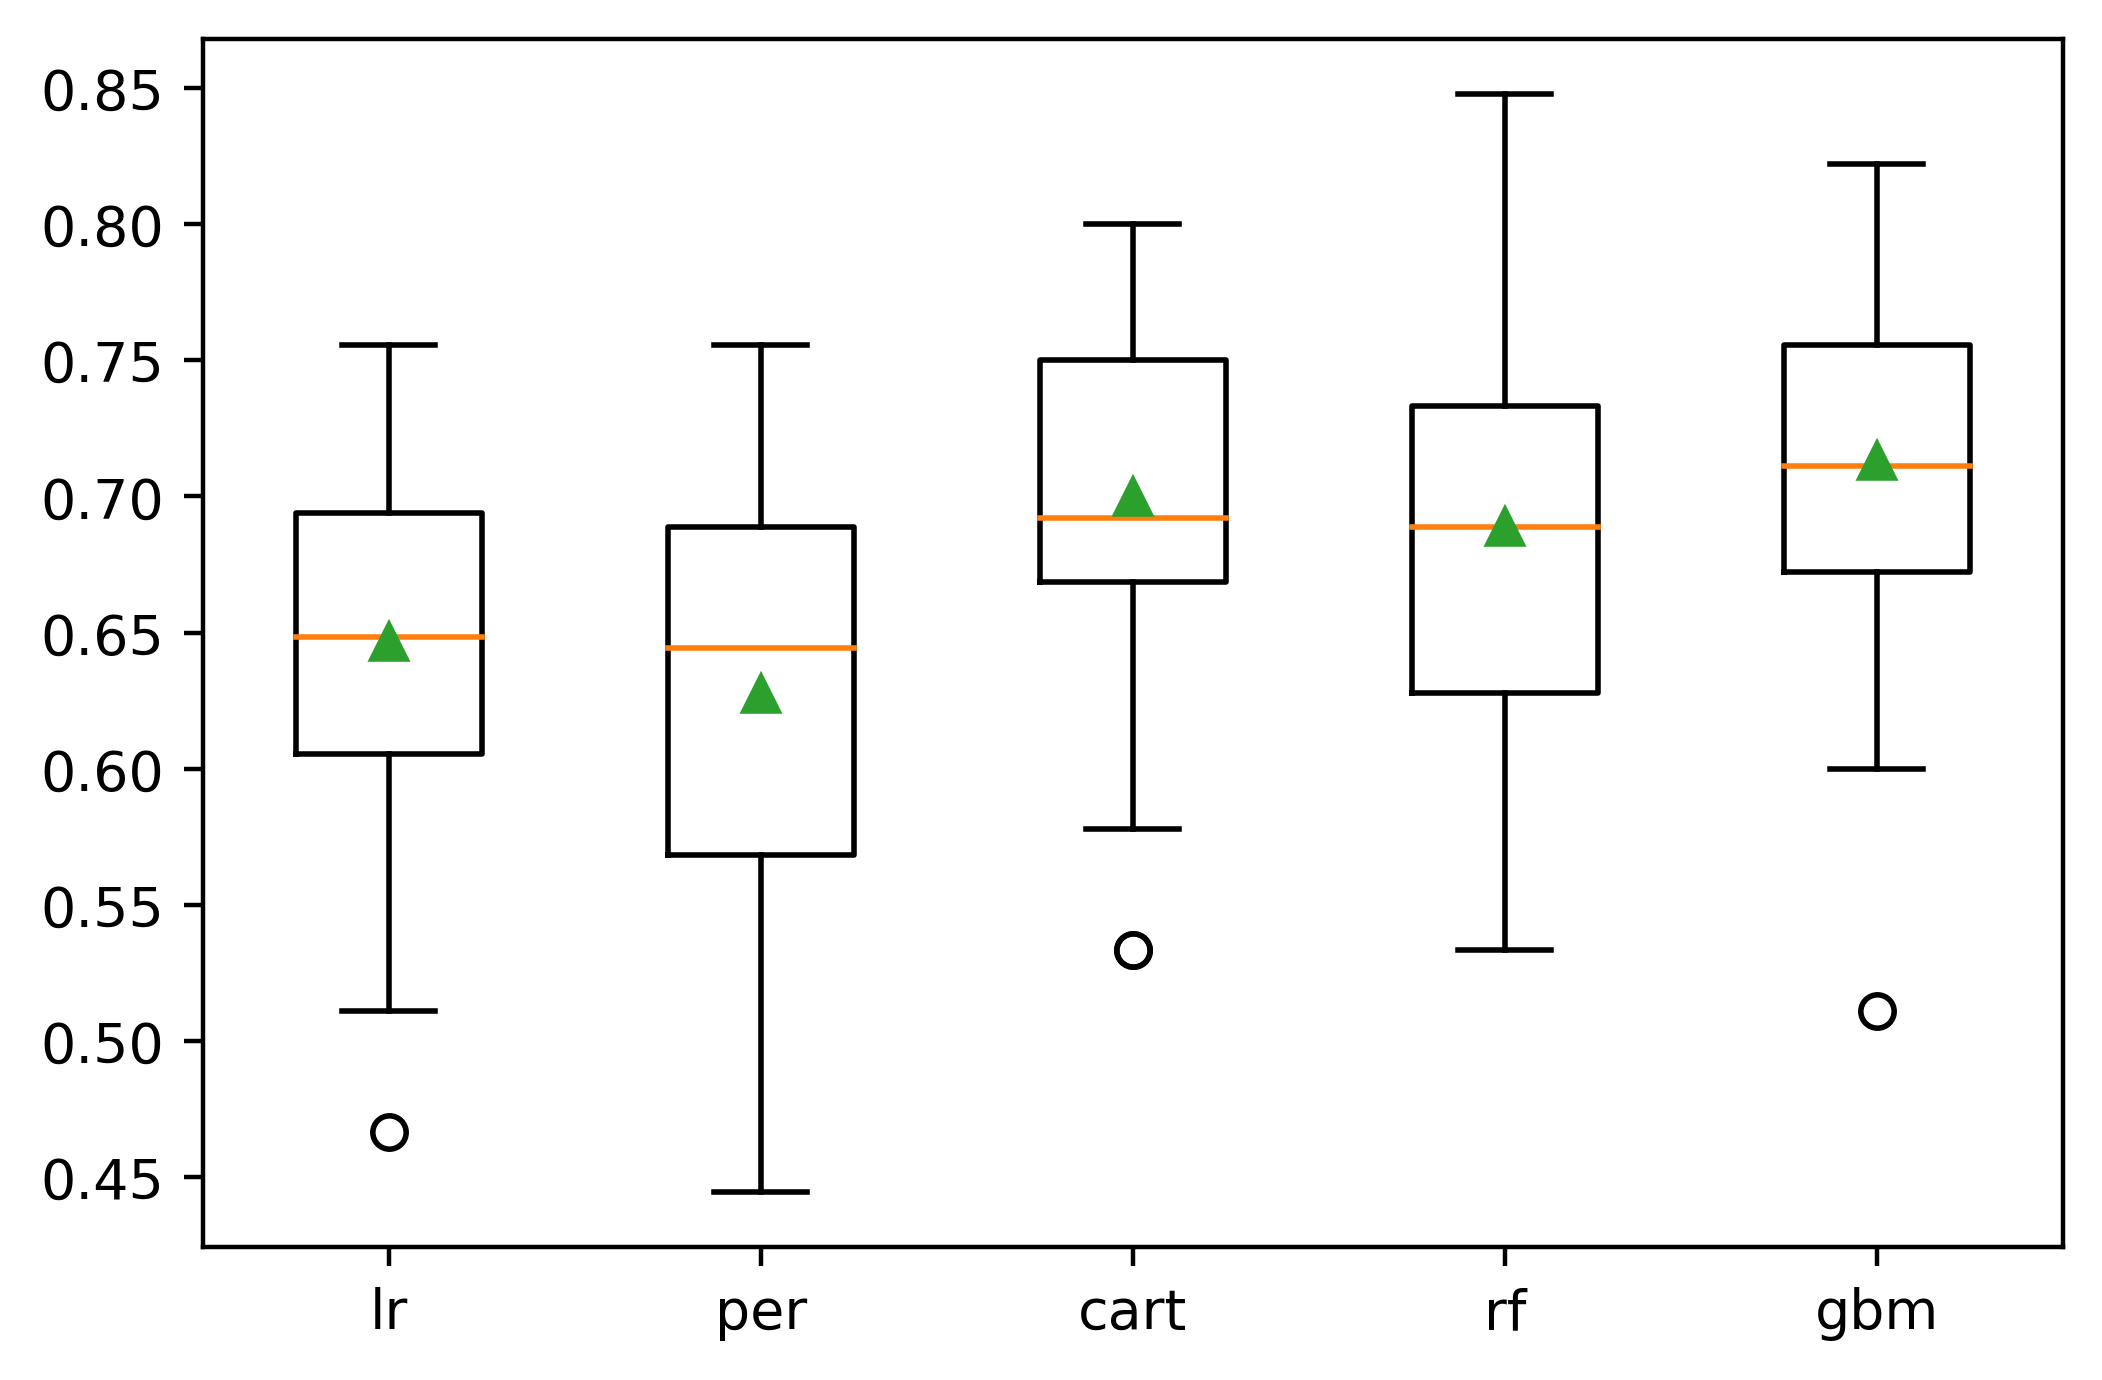

In [72]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
  
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
#     rfe = RFE(estimator=LogisticRegression(), n_features_to_select=100)
#     model = DecisionTreeClassifier()
#     models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
#     # perceptron
#     rfe = RFE(estimator=Perceptron(), n_features_to_select=100)
#     model = DecisionTreeClassifier()
#     models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=100)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=100)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=100)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()